В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.


In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [3]:
z=np.array([-2, -1, 0, 1, 2])

In [4]:
sigmoid(z)

array([0.11920292, 0.26894142, 0.5       , 0.73105858, 0.88079708])



#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


In [10]:
theta = [0.5, -0.5]
X = [[1, 2], [1, -1], [1, 0], [1, 1]]
def hypothesis(theta, X):
    matrix = np.dot(X, theta)
    return sigmoid(matrix)

hypothesis(theta, X)    

array([0.37754067, 0.73105858, 0.62245933, 0.5       ])

#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

In [31]:
def compute_gradient(theta, X, y):
    return sum(np.dot((hypothesis(theta, X) - y), X))/len(X)

In [32]:
theta = [0.5, -0.5]
y = np.array([1, 0, 1, 0])
X = [[1, 2], [1, -1], [1, 0], [1, 1]]
compute_gradient(theta, X, y)

-0.31122966560092735


#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це. - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


In [33]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    theta = [0.5, -0.5]
    errors = []
    for _ in range(epochs):
        hyp = hypothesis(theta, X)
        error = hyp - y
        errors.append(sum(error**2))
        gradient = compute_gradient(theta, X, y)
        theta = theta - lr * gradient
    return theta, errors  

In [35]:
X = [[1,2], [1,-1], [1,0], [1,1]]
y = np.array([1, 0, 1, 0])
theta, errors = full_batch_gradient_descent(X, y)

In [36]:
theta

array([ 0.86909086, -0.13090914])

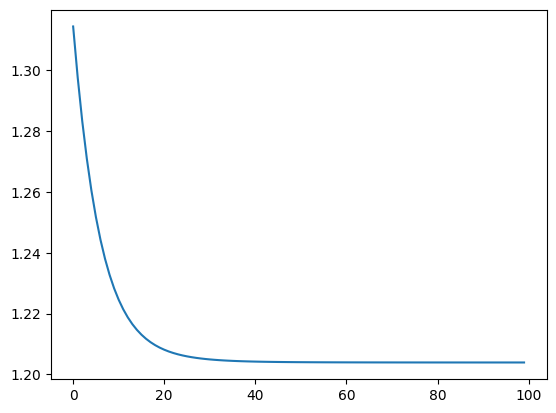

In [40]:
plt.plot(errors);

#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.

In [43]:
def predict_proba(theta, X):
    return hypothesis(theta, X)

In [56]:
predict_proba(theta, X)

array([0.64731839, 0.73105858, 0.70455649, 0.67659812])

In [65]:
def predict(theta, X, threshold=0.5):
    hyp = hypothesis(theta, X)
    probability = []
    for i in hyp:
        if i<threshold:
            probability.append(0)
        else:
            probability.append(1)
    return probability      
        

In [67]:
pred = predict(theta, X)

In [68]:
pred

[1, 1, 1, 1]

In [54]:
def accuracy(y_true, y_pred):
    m = len(y_true)
    sum = 0
    for i in range(m):
        if y_true[i]==y_pred[i]:
            sum += 1
    return sum/m        
            

In [69]:
accuracy(y, pred)

0.5